迭代次数 1 选中的误分类点： [3 3] alpha： [1. 0. 0.] b： 1
迭代次数 2 选中的误分类点： [1 1] alpha： [1. 0. 1.] b： 0
迭代次数 3 选中的误分类点： [1 1] alpha： [1. 0. 2.] b： -1
迭代次数 4 选中的误分类点： [1 1] alpha： [1. 0. 3.] b： -2
迭代次数 5 选中的误分类点： [3 3] alpha： [2. 0. 3.] b： -1
迭代次数 6 选中的误分类点： [1 1] alpha： [2. 0. 4.] b： -2
迭代次数 7 选中的误分类点： [1 1] alpha： [2. 0. 5.] b： -3
迭代完成
[1. 1.] -3


(0.0, 5.0)

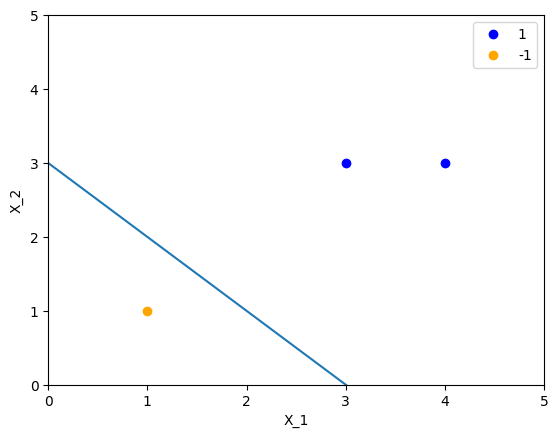

In [13]:
#导入模块
import numpy as np
import matplotlib.pyplot as plt

#定义一个模型类
class preceptron_dual:
    def __init__(self,alpha,b,learning_rate,X_train,Y_train):
        self.alpha = alpha
        self.w = 0
        self.b = b
        self.learning_rate = learning_rate
        self.X_train = X_train
        self.Y_train = Y_train
    
    #迭代
    def iteration(self):
        sign = False 
        iteration_count = 0#迭代次数
        while not sign: #sign为False时保持循环，sign为Ture时停止循环
            wrong_count = 0
            for i in range(len(self.Y_train)):
                Sum = 0
                for j in range(len(self.Y_train)):
                    Sum += self.alpha[j]*self.Y_train[j]*np.dot(self.X_train[i],self.X_train[j])
                if self.Y_train[i]*(Sum+self.b) <= 0:
                    self.alpha[i] = self.alpha[i] + self.learning_rate 
                    self.b = self.b + self.learning_rate*self.Y_train[i]
                    wrong_count += 1
                    iteration_count += 1
                    print('迭代次数',iteration_count,'选中的误分类点：',self.X_train[i],'alpha：',self.alpha,'b：',self.b) #显示迭代过程
            if wrong_count == 0:
                sign = True
        for i in range(len(self.Y_train)):
            self.w += self.alpha[i]*self.Y_train[i]*self.X_train[i]
        print('迭代完成')


#导入数据
data = np.array([[3,3,1],[4,3,1],[1,1,-1]])
X_train = data[:,[0,1]]
Y_train = data[:,2]
#初始化 (alpha和b的初值都取为0,步长取为1)
alpha = np.zeros(len(Y_train))
b = 0
learning_rate = 1


#使用模型
pd = preceptron_dual(alpha,b,learning_rate,X_train,Y_train) 
pd.iteration()


#迭代完的参数
print(pd.w,pd.b)


#作图
x_points = np.linspace(0, 4.5, 10)
y_ = -(pd.w[0] * x_points + pd.b) / pd.w[1]
plt.plot(x_points, y_)

plt.plot(X_train[0:2,0], X_train[0:2,1],'o',color='blue', label='1')
plt.plot(X_train[2,0], X_train[2,1], 'o' ,color='orange', label='-1')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.legend()

plt.ylim(0,5)
plt.xlim(0,5)